In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Twitter%20Daily%20Stock%20Prices%202013-2022/TWTR%20(1).csv', index_col ='Date', parse_dates = True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2129 entries, 2013-11-07 to 2022-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2129 non-null   float64
 1   High       2129 non-null   float64
 2   Low        2129 non-null   float64
 3   Close      2129 non-null   float64
 4   Adj Close  2129 non-null   float64
 5   Volume     2129 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.4 KB


In [5]:
df['Open'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap ='vlag', subset = 'Count')

,index,Count
0,36.500000,6
1,16.610001,5
2,38.000000,5
3,34.970001,5
4,36.450001,5
5,18.000000,5
6,30.940001,4
7,16.340000,4
8,36.000000,4
9,32.750000,4


In [6]:
df['Close'].value_counts()\
            .head(20)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap = 'vlag', subset='Count')

,index,Count
0,18.629999,5
1,18.299999,5
2,16.910000,4
3,32.730000,4
4,17.370001,4
5,14.400000,4
6,37.279999,4
7,33.389999,4
8,17.090000,4
9,18.230000,4


In [7]:
df['High'].value_counts()\
            .head(20)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='vlag', subset='Count')

,index,Count
0,17.070000,5
1,35.139999,4
2,42.000000,4
3,17.150000,4
4,41.480000,4
5,17.049999,4
6,17.040001,4
7,18.340000,4
8,17.600000,4
9,15.990000,4


In [8]:
df['Low'].value_counts()\
            .head(20)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='vlag', subset='Count')

,index,Count
0,35.950001,5
1,16.010000,5
2,16.430000,5
3,17.500000,5
4,17.520000,4
5,18.200001,4
6,16.459999,4
7,36.410000,4
8,17.469999,4
9,37.560001,4


Text(0, 0.5, 'Open')

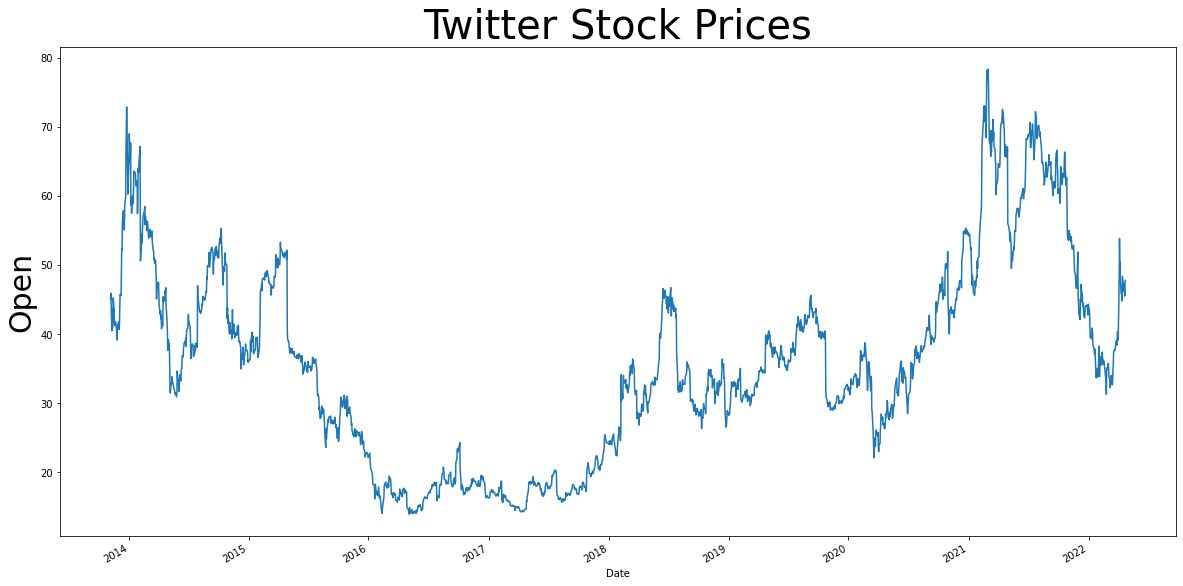

In [9]:
df['Open'].plot(label = 'Twitter',figsize = (20,10))
plt.title('Twitter Stock Prices', fontsize = 40)
plt.ylabel('Open', fontsize = 30)

Text(0, 0.5, 'Volume')

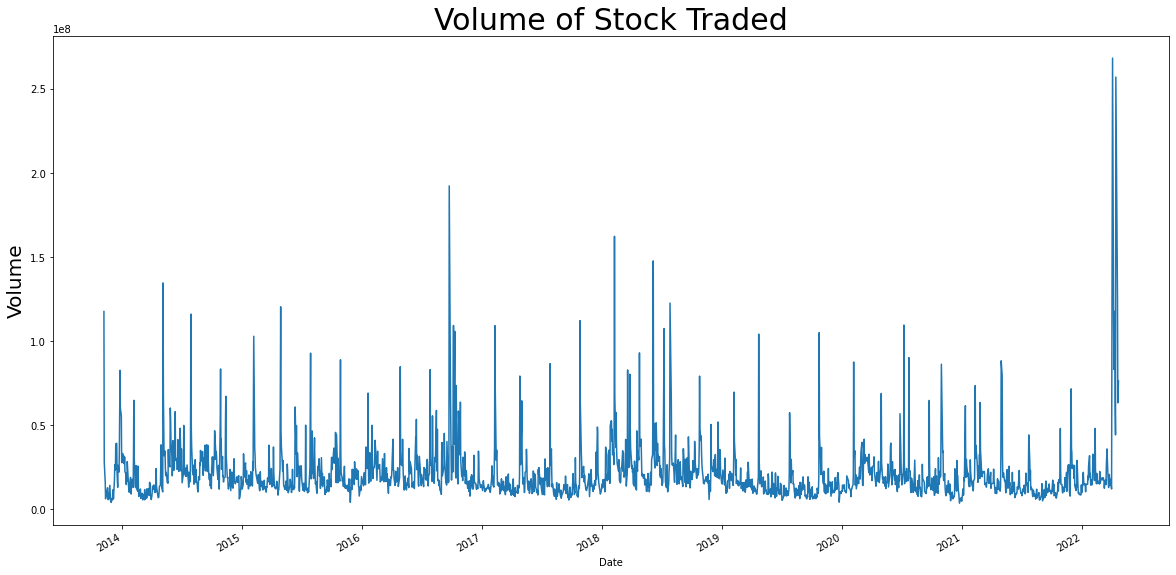

In [10]:
df['Volume'].plot(label = 'Twitter', figsize = (20,10))
plt.title('Volume of Stock Traded', fontsize = 30)
plt.ylabel('Volume', fontsize = 20)

Text(0.5, 1.0, 'Market Cap')

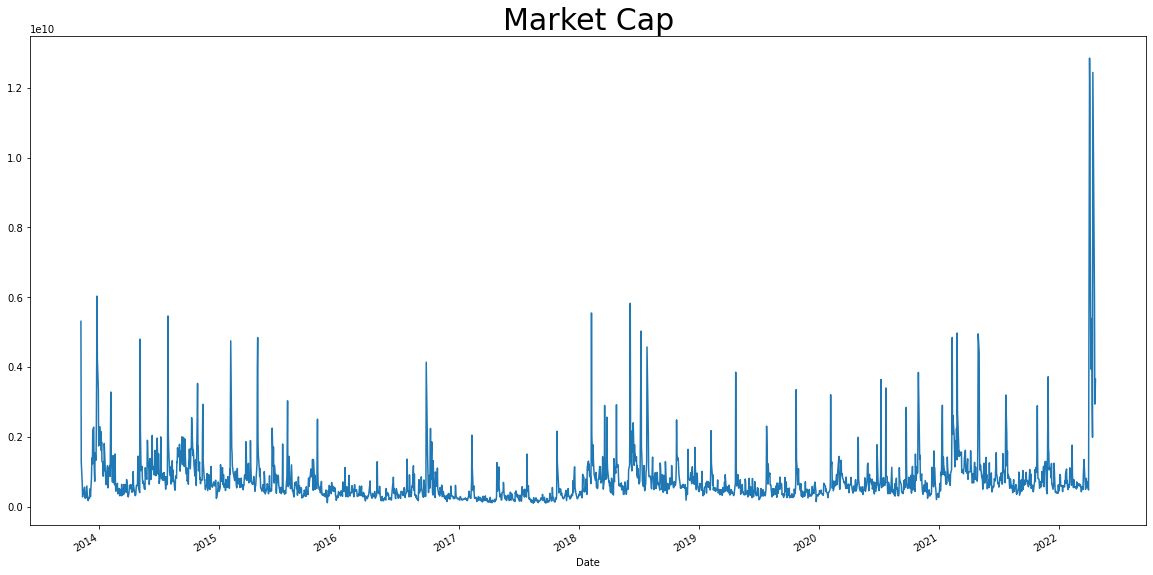

In [11]:
df['Mcap'] = df['Open'] * df['Volume']
df['Mcap'].plot(label = 'Twitter', figsize = (20,10))
plt.title('Market Cap', fontsize = 30)

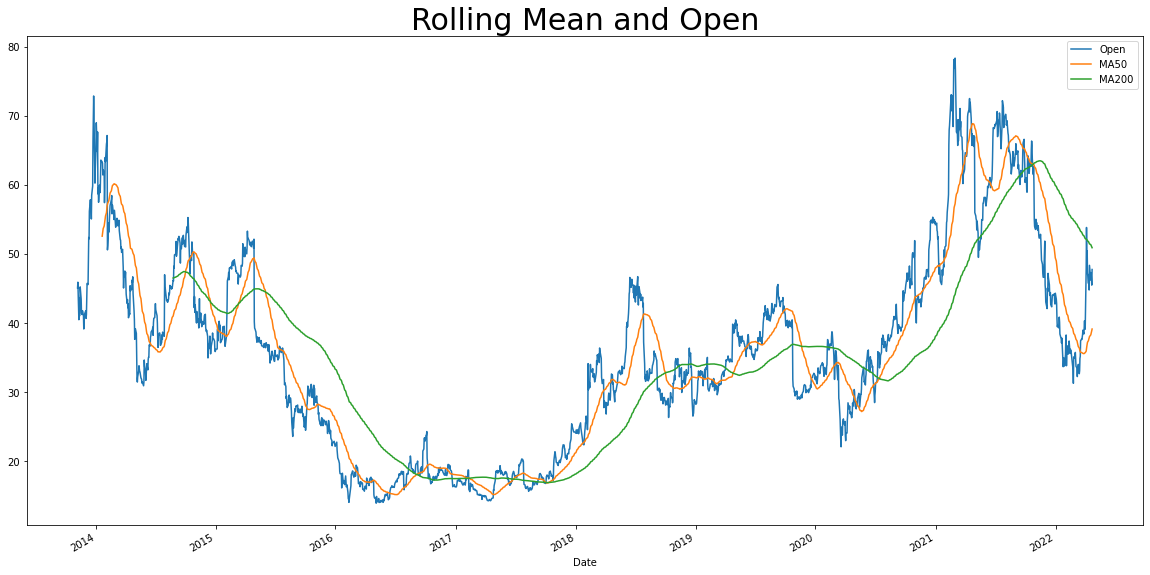

In [12]:
df['MA50'] = df['Open'].rolling(50).mean()
df['MA200'] = df['Open'].rolling(200).mean()
df['Open'].plot(figsize = (20,10))
plt.title('Rolling Mean and Open', fontsize = 30)
df['MA50'].plot()
df['MA200'].plot()
plt.legend()

Text(0.5, 1.0, 'Volatility')

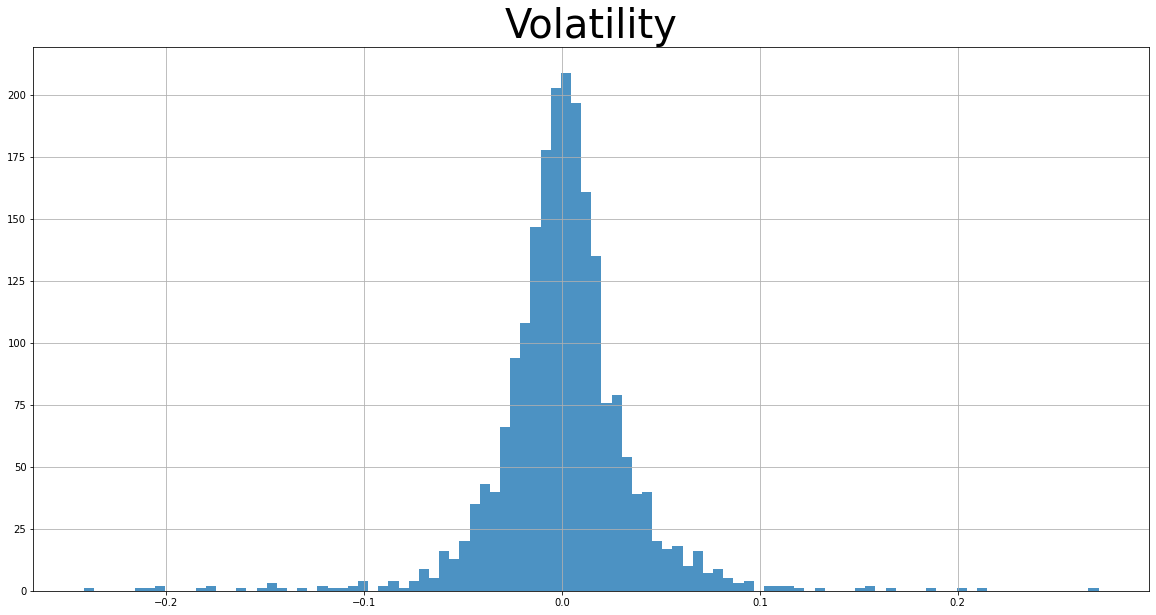

In [13]:
df['returns'] = (df['Close']/df['Close'].shift(1)) -1
df['returns'].hist(bins = 100, label = 'Twitter', alpha = 0.8, figsize = (20,10))
plt.title('Volatility', fontsize = 40)

In [14]:
df["returns"]

Date
2013-11-07         NaN
2013-11-08   -0.072383
2013-11-11    0.030012
2013-11-12   -0.023310
2013-11-13    0.016706
                ...   
2022-04-18    0.074756
2022-04-19   -0.047265
2022-04-20    0.012132
2022-04-21    0.007706
2022-04-22    0.039295
Name: returns, Length: 2129, dtype: float64

In [15]:
df = df.dropna()
print(df.shape)

(1930, 10)


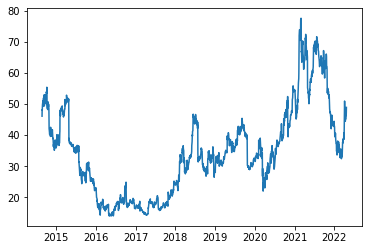

In [16]:
cle = df['Close']
plt.plot(cle)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(cle, autolag='AIC')
print(results)

(-1.9619730595806917, 0.3034913360132657, 2, 1927, {'1%': -3.4337480448059057, '5%': -2.8630410420241277, '10%': -2.5675690958517277}, 6101.505465763056)


In [18]:
cle1 = cle - cle.shift(1)
cle1 = cle1.dropna()
diff_results = adfuller(cle1, autolag='AIC')
print(diff_results)

(-28.847616335822448, 0.0, 1, 1927, {'1%': -3.4337480448059057, '5%': -2.8630410420241277, '10%': -2.5675690958517277}, 6099.051475249724)


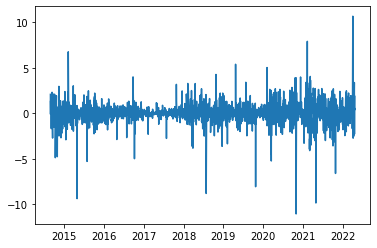

In [19]:
plt.plot(cle1)
plt.show()

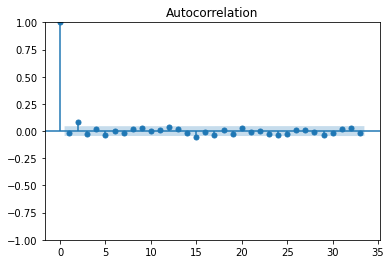

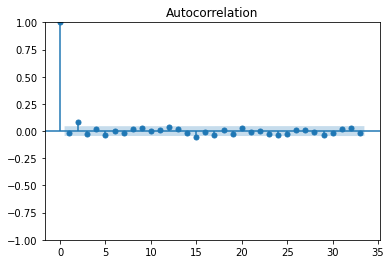

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(cle1)

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


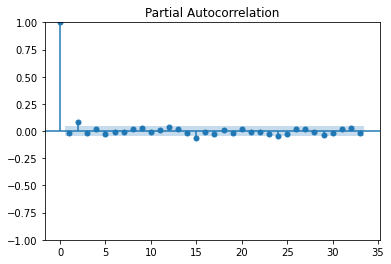

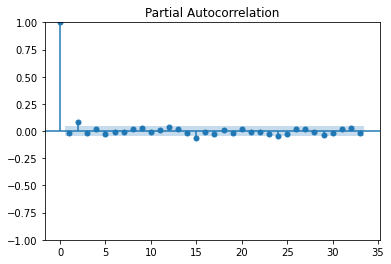

In [21]:
plot_pacf(cle1)

In [22]:
cletrain = cle[0:1400]
cletest = cle[1400:]
print('train shape: ', cletrain.shape)
print('test shape: ', cletest.shape)

train shape:  (1400,)
test shape:  (530,)


In [23]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(cletrain, order = (1,1,8))
fit_model = model.fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
model1 = ARIMA(cletrain, order = (1,1,9))
fit_model1 = model1.fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
model2 = ARIMA(cletrain, order=(1,1,7))
fit_model2 = model2.fit()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
print('model-aic: ', fit_model.aic)
print('model1-aic: ', fit_model1.aic)
print('model2-aic: ', fit_model2.aic)

model-aic:  4020.928713744124
model1-aic:  4022.4159757837338
model2-aic:  4021.2275505446096


In [27]:
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1400
Model:                 ARIMA(1, 1, 8)   Log Likelihood               -2000.464
Date:                Fri, 13 May 2022   AIC                           4020.929
Time:                        20:46:50   BIC                           4073.364
Sample:                             0   HQIC                          4040.531
                               - 1400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7164      0.329     -2.177      0.029      -1.361      -0.071
ma.L1          0.6892      0.332      2.079      0.038       0.039       1.339
ma.L2          0.0034      0.029      0.118      0.9

In [28]:
residuals = pd.DataFrame(fit_model.resid)
residuals = residuals.iloc[1:]
residuals.describe()

,0
count,1399.000000
mean,-0.014932
std,1.011309
min,-9.284192
25%,-0.372451
50%,0.017239
75%,0.387583
max,6.745902


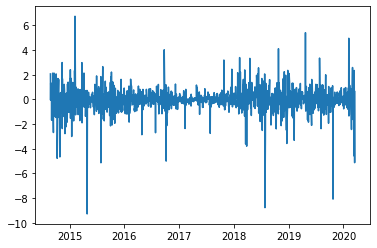

In [29]:
plt.plot(residuals)
plt.show()

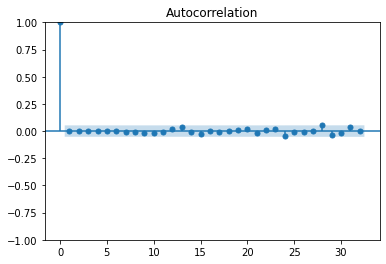

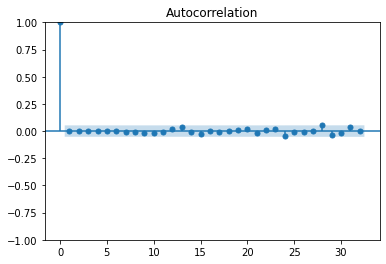

In [31]:
plot_acf(residuals)